# Code for preprocessing the data for training a Regeressor

###### Note : following code is an example for preprocessing the data for a regressor
###### this code is based on left shoulder, elbow and wrist coordinates

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,2_y,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,-0.513346,-0.486864,0.978329,1.0,-0.537284,-0.468331,0.907438,1.0,-0.551415,-0.468160,...,-0.712293,0.004528,-0.563900,-1.402235,-0.169188,0.001297,-0.414179,-1.400190,-0.236010,0.001425
1,-0.516051,-0.487786,0.801669,1.0,-0.540958,-0.469537,0.745705,1.0,-0.554932,-0.469614,...,-0.586721,0.003706,-0.546744,-1.396654,-0.105789,0.000889,-0.416563,-1.392031,-0.177770,0.000804
2,-0.517325,-0.486723,0.786777,1.0,-0.542302,-0.468774,0.730178,1.0,-0.556188,-0.468928,...,-0.572160,0.004798,-0.549911,-1.392735,-0.099640,0.001099,-0.424577,-1.388623,-0.168463,0.000999
3,-0.517781,-0.486719,0.770728,1.0,-0.542295,-0.468731,0.714361,1.0,-0.556079,-0.468834,...,-0.563850,0.004306,-0.552028,-1.392125,-0.066083,0.000939,-0.423960,-1.386563,-0.159205,0.000809
4,-0.519239,-0.487284,0.833225,1.0,-0.543011,-0.469002,0.772886,1.0,-0.556789,-0.469014,...,-0.574910,0.003707,-0.566962,-1.390860,-0.077285,0.000848,-0.432768,-1.386580,-0.154454,0.000748


In [3]:
#collecting metadata
data = df[['11_x', '11_y', '13_x', '13_y', '15_x', '15_y']]

In [4]:
#renaming columns
data.columns = ['left_shoulder_X', 'left_shoulder_Y',
                'left_elbow_X', 'left_elbow_Y',
                'left_wrist_X', 'left_wrist_Y']

In [5]:
#useful metadata
data.head()

,left_shoulder_X,left_shoulder_Y,left_elbow_X,left_elbow_Y,left_wrist_X,left_wrist_Y
0,-0.701167,-0.579701,-0.946057,-0.599737,-0.853154,-0.475083
1,-0.703238,-0.579433,-0.941791,-0.608207,-0.852376,-0.479572
2,-0.700262,-0.579484,-0.940807,-0.608857,-0.851227,-0.480896
3,-0.699332,-0.578418,-0.936533,-0.613209,-0.850773,-0.483470
4,-0.701886,-0.577890,-0.936760,-0.610650,-0.852075,-0.482287


### Preprocess

In [6]:
#getting the values
x1 = data['left_shoulder_X']
y1 = data['left_shoulder_Y']
x2 = data['left_elbow_X']
y2 = data['left_elbow_Y']
x3 = data['left_wrist_X']
y3 = data['left_wrist_Y']

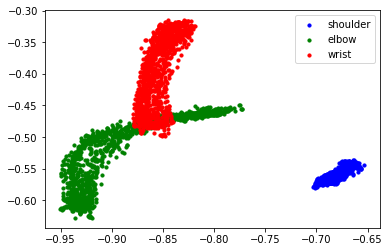

In [7]:
#displaying raw metadata
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, s = 10, c = 'blue', label = 'shoulder')
ax1.scatter(x2, y2, s = 10, c = 'green', label = 'elbow')
ax1.scatter(x3, y3, s = 10, c = 'red', label = 'wrist')
plt.legend(loc='upper right');
plt.show()

#### Encryption-Decryption Algorithm

In [8]:
#some important functions


#slope formula
def slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

#ditance formula
def distance(x1, y1, x2, y2):
    return ((y2-y1)**2 + (x2-x1)**2)**0.5

#rounding off the values for elbow coordinates into an arc
def roundoff_elbow(x1, y1, x2, y2):
    s = slope(x1, y1, x2, y2)
    d = 1
    x = d * (1 / (1+s**2))**0.5
    y = s*x
    return -round(x, 3), -round(y, 3)

#rounding off the values for wrist coordinates
def roundoff_wrist(x1, y1, x2, y2, x3, y3):
    s = slope(x1, y1, x2, y2)
    d = 1
    x = (d * (1 / (1+s**2))**0.5) + x3
    y = s*(x-x3) + y3
    return x, y

#decrypting the predicted values into real values
def retrivew_wrist(x1, y1, x2, y2, x3, y3, x4, y4):
    s = slope(x1, y1, x2, y2)
    d = distance(x3, y3, x4, y4)
    x = (d * (1 / (1+s**2))**0.5) + x3
    y = s*(x-x3) + y3
    return x, y

In [9]:
#rounding-off data
a, b = roundoff_elbow(x1, y1, x2, y2)
c, d = roundoff_wrist(x2, y2, x3, y3, a, b)

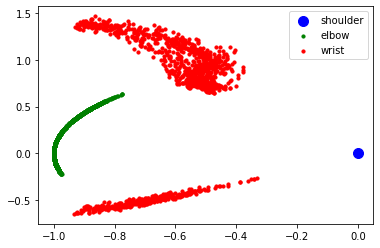

In [10]:
#displaying rounded data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(0, 0, s = 100, c = 'blue', label = 'shoulder')
ax1.scatter(a, b, s = 10, c = 'green', label = 'elbow')
ax1.scatter(c, d, s = 10, c = 'red', label = 'wrist')
plt.legend(loc='upper right');
plt.show()

#### Converting to a DataFrame

In [11]:
wrist_dataset = pd.DataFrame({'elbow_X': a,'elbow_Y': b, 'wrist_X': c, 'wrist_Y':d})
wrist_dataset.head()

,elbow_X,elbow_Y,wrist_X,wrist_Y
0,-0.997,-0.082,-0.399421,0.719810
1,-0.993,-0.120,-0.422238,0.701115
2,-0.993,-0.121,-0.419506,0.698209
3,-0.989,-0.145,-0.437571,0.689222
4,-0.990,-0.138,-0.439313,0.696712


### Reference for Training a Regressor

In [12]:
x = wrist_dataset.iloc[:, :2]
y = wrist_dataset.iloc[:, 2:]

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [30]:
def reg_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units'+str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(2,activation='linear'))
    model.compile(
                  optimizer=keras.optimizers.Adam(
                                                  hp.Choice('learning_rate',[1e-2,1e-3,1e-4])
                  ),
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error']
    )
    return model

In [31]:
tuner=RandomSearch(
                   reg_model,
                   objective='val_mean_absolute_error',
                   max_trials=5,
                   executions_per_trial=3,
                   directory='project',
                   project_name='Pose estimation'
)

INFO:tensorflow:Reloading Oracle from existing project project/Pose estimation/oracle.json
INFO:tensorflow:Reloading Tuner from project/Pose estimation/tuner0.json


In [32]:
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units6 (Int)
{'default': None, 'condition

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.results_summary()

Results summary
Results in project/Pose estimation
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units0: 480
units1: 192
learning_rate: 0.001
units2: 448
units3: 384
units4: 448
units5: 352
units6: 480
units7: 32
units8: 384
units9: 224
units10: 256
units11: 288
units12: 192
units13: 352
units14: 320
units15: 160
units16: 256
units17: 64
Score: 0.11714543650547664
Trial summary
Hyperparameters:
num_layers: 18
units0: 160
units1: 224
learning_rate: 0.001
units2: 96
units3: 352
units4: 320
units5: 128
units6: 128
units7: 288
units8: 480
units9: 288
units10: 384
units11: 416
units12: 512
units13: 192
units14: 352
units15: 32
units16: 32
units17: 32
Score: 0.14841475089391074
Trial summary
Hyperparameters:
num_layers: 12
units0: 320
units1: 160
learning_rate: 0.001
units2: 416
units3: 512
units4: 32
units5: 320
units6: 32
units7: 320
units8: 512
units9: 512
units10: 352
units11: 192
units12: 96
units13: 416
un

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
def regression_model():
    # create model
    model = Sequential()

    model.add(Dense(160,activation='relu', input_shape=(2,)))
    model.add(Dense(320, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model#The above function create a model that has two hidden layers, each of 50 hidden units.

In [81]:
model = regression_model()

In [82]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
19/19 - 1s - loss: 0.3466 - val_loss: 0.2343
Epoch 2/100
19/19 - 0s - loss: 0.2056 - val_loss: 0.1734
Epoch 3/100
19/19 - 0s - loss: 0.1604 - val_loss: 0.1370
Epoch 4/100
19/19 - 0s - loss: 0.1201 - val_loss: 0.1086
Epoch 5/100
19/19 - 0s - loss: 0.0974 - val_loss: 0.0912
Epoch 6/100
19/19 - 0s - loss: 0.0805 - val_loss: 0.0752
Epoch 7/100
19/19 - 0s - loss: 0.0689 - val_loss: 0.0720
Epoch 8/100
19/19 - 0s - loss: 0.0688 - val_loss: 0.0770
Epoch 9/100
19/19 - 0s - loss: 0.0656 - val_loss: 0.0642
Epoch 10/100
19/19 - 0s - loss: 0.0604 - val_loss: 0.0636
Epoch 11/100
19/19 - 0s - loss: 0.0590 - val_loss: 0.0619
Epoch 12/100
19/19 - 0s - loss: 0.0586 - val_loss: 0.0619
Epoch 13/100
19/19 - 0s - loss: 0.0584 - val_loss: 0.0634
Epoch 14/100
19/19 - 0s - loss: 0.0603 - val_loss: 0.0610
Epoch 15/100
19/19 - 0s - loss: 0.0587 - val_loss: 0.0622
Epoch 16/100
19/19 - 0s - loss: 0.0666 - val_loss: 0.1084
Epoch 17/100
19/19 - 0s - loss: 0.0636 - val_loss: 0.0685
Epoch 18/100
19/19 - 0s

In [83]:
pred=model.predict(X_test)
pred

array([[-0.79806995, -0.34032395],
       [-0.5312855 ,  1.0742341 ],
       [-0.5381628 ,  1.1128017 ],
       [-0.59403825,  1.1877191 ],
       [-0.54562175,  1.1231034 ],
       [-0.620363  ,  1.2184874 ],
       [-0.5393305 ,  0.9007597 ],
       [-0.5315134 ,  0.8579562 ],
       [-0.5306869 ,  1.0695715 ],
       [-0.6342554 ,  1.2338767 ],
       [-0.5205118 ,  0.8038236 ],
       [-0.53800595,  0.9259904 ],
       [-0.5215679 ,  0.8116605 ],
       [-0.5305949 ,  1.0018618 ],
       [-0.52537143,  0.8298017 ],
       [-0.7843276 ,  1.1893916 ],
       [-0.5298616 ,  0.78308916],
       [-0.601203  ,  1.196698  ],
       [-0.5375334 ,  0.9319605 ],
       [-0.52114105,  0.80076534],
       [-0.814592  ,  1.0703669 ],
       [-0.53524965,  0.9608166 ],
       [-0.58051825, -0.40239558],
       [-0.8732369 ,  0.5986546 ],
       [-0.8690182 ,  0.44504037],
       [-0.5256864 ,  1.0381334 ],
       [-0.52708626,  0.8381653 ],
       [-0.5317362 ,  0.9959861 ],
       [-0.8167605 ,

In [84]:
score = model.evaluate(X_test, y_test,verbose=0)
print('Loss:',score)

Loss: 0.056156717240810394


#### after training a regression model

In [85]:
#original shoulder
sx = x1[0]
sy = y1[0]
#original elbow
i3 = x2[0]
j3 = y2[0]
#original wrist
i4 = x3[0]
j4 = y3[0]

#rounded elbow
i1, j1 = roundoff_elbow(sx, sy, i3, j3)
#predicted wrist / rounded wrist
ans = model.predict([[i1, j1]])
i2, j2 = ans[0][0], ans[0][1]

#decrypting wrist
print(retrivew1(i1,j1,i2,j2,i3,j3,i4,j4))

print(i4, j4)

NameError: NameError: name 'retrivew1' is not defined